In [1]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read Test and Train
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
# Features in the dataset
train.columns, test.columns

(Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'))

In [7]:
# Shape of the dataset
train.shape, test.shape

((614, 13), (367, 12))

In [8]:
# Checking the no of loan allowed and not ratio
# Normalize can be set to True to print proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

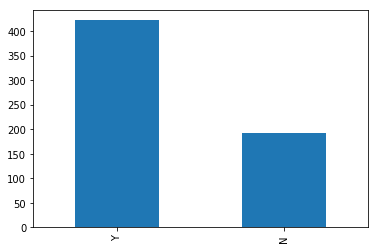

In [9]:
#Ploating in Bar
train['Loan_Status'].value_counts().plot.bar()

In [10]:
# checking missing values in each column of train dataset
print(train.apply(lambda x: sum(x.isnull()),axis=0))
print("------------------------------------")
#checking missing values in each column of test dataset
print(test.apply(lambda x: sum(x.isnull()),axis=0))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
------------------------------------
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


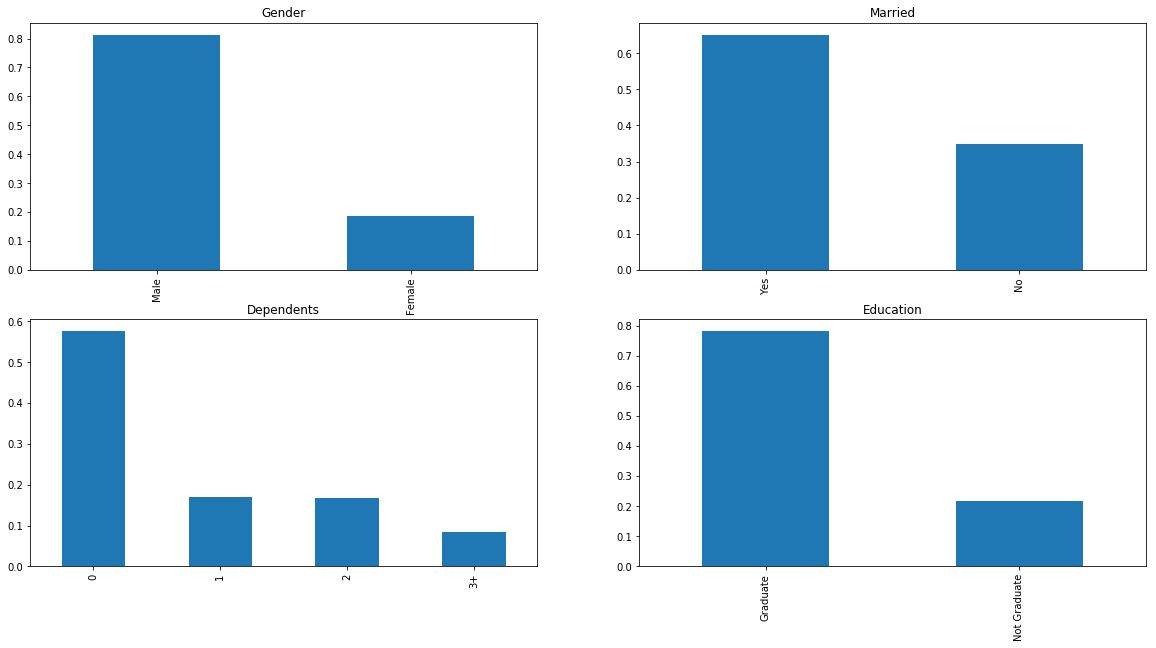

In [11]:
# Visualizing categorical features of Training data
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(223)
train['Dependents'].value_counts(normalize=True).plot.bar(title= 'Dependents')

plt.subplot(224)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()

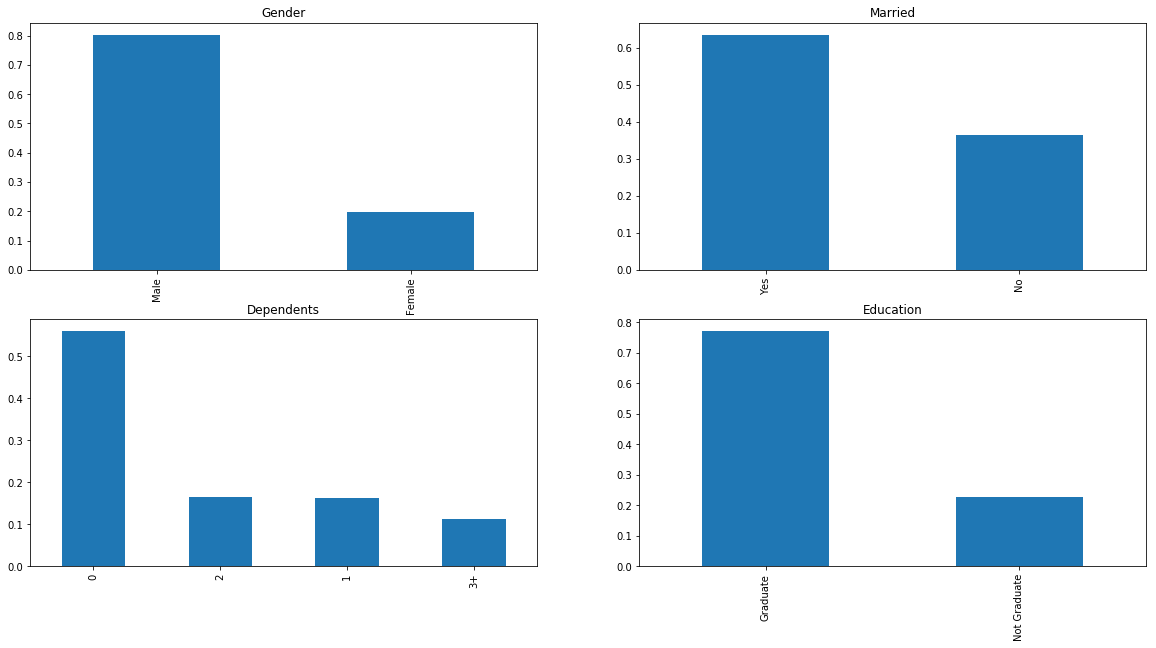

In [12]:
# Visualizing categorical features of Testing data
plt.figure(1)
plt.subplot(221)
test['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
test['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(223)
test['Dependents'].value_counts(normalize=True).plot.bar(title= 'Dependents')

plt.subplot(224)
test['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()

In [13]:
#Filling all the na values with the heighest no of occurance.
train.Gender = train.Gender.fillna('Male')
test.Gender = test.Gender.fillna('Male')
train.Married = train.Married.fillna('Yes')
test.Married = test.Married.fillna('Yes')
train.Dependents = train.Dependents.fillna('0')
test.Dependents = test.Dependents.fillna('0')
train.Self_Employed = train.Self_Employed.fillna('No')
test.Self_Employed = test.Self_Employed.fillna('No')
train.LoanAmount = train.LoanAmount.fillna(train.LoanAmount.mean())
test.LoanAmount = test.LoanAmount.fillna(test.LoanAmount.mean())
train.Loan_Amount_Term = train.Loan_Amount_Term.fillna(360.0)
test.Loan_Amount_Term = test.Loan_Amount_Term.fillna(360.0)
train.Credit_History = train.Credit_History.fillna(1.0)
test.Credit_History = test.Credit_History.fillna(1.0)

In [14]:
# checking missing values in each column of train dataset after filling the na values
print(train.apply(lambda x: sum(x.isnull()),axis=0))
print("+++++++++++++++++++++++++++++++")
#checking missing values in each column of test dataset After filling the na values
print(test.apply(lambda x: sum(x.isnull()),axis=0))

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
+++++++++++++++++++++++++++++++
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


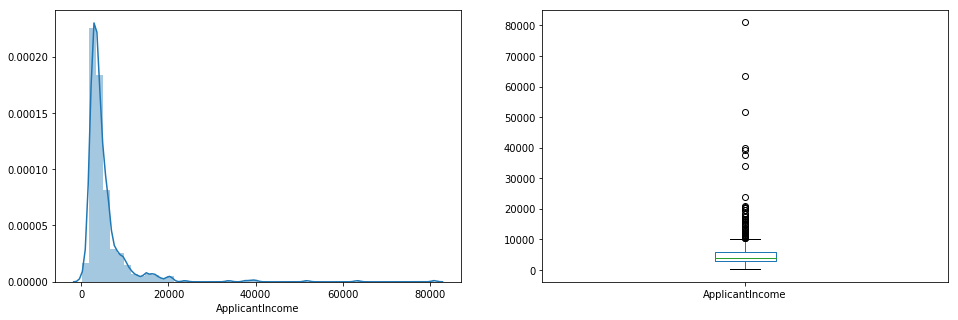

In [15]:
# Visualizing numerical features
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

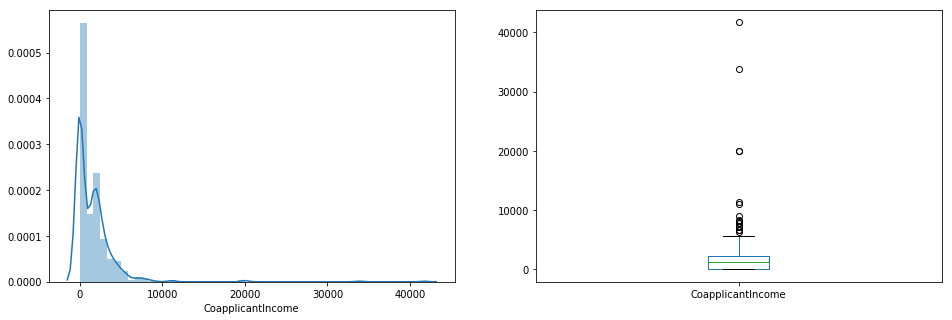

In [16]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

In [17]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)
X = train.drop('Loan_Status',1)
y = train.Loan_Status
# Adding dummies to the dataset
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

# Applying Classification Algorithms
## Logistic Regression

In [18]:
# Importing packages for cross validation and logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [19]:
# logistic regression
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8278688524590164


## Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = RandomForestClassifier(random_state=1, max_depth=10)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.7903225806451613

2 of kfold 5
accuracy_score 0.782258064516129

3 of kfold 5
accuracy_score 0.7868852459016393

4 of kfold 5
accuracy_score 0.7622950819672131

5 of kfold 5
accuracy_score 0.819672131147541
